# Bitcoin and Gold Price Analysis

### What is Bitcoin? What is Blockchain?

Bitcoin (BTC) is a cryptocurrency, a virtual currency designed to act as money and a form of payment outside the control of any one person, group, or entity, thus removing the need for third-party involvement in financial transactions. It is rewarded to blockchain miners for the work done to verify transactions and can be purchased on several exchanges.

Bitcoin was introduced to the public in 2009 by an anonymous developer or group of developers using the name Satoshi Nakamoto.

Cryptocurrencies are part of a blockchain and the network required to power it. A blockchain is a distributed ledger, a shared database that stores data. Data within the blockchain is secured by encryption methods.

If you want to know more about digital currencies, visit the link: [Learn more about Bitcoin](https://www.investopedia.com/terms/b/bitcoin.asp).

---

### Now we start with the question:

**What is the difference between the change in the price of Bitcoin and Gold?**



# Load Data
Let's load the data now.

In [1]:
Bitcoin_Gold_price <- read.csv('/kaggle/input/bitcoin-and-gold-historical-daily-data/Bitcoin and Gold Historical Daily Data.csv')

The dataset consists of 3160 observations and 9 variables:

Date:Bitcoin and gold prices daily

Open - This is the opening price of the time period (in US Dollars)

High - This is the highest price of the time period (in US Dollars).

Low - This is the lowest price of the time period (in US Dollars).

Close - This is the closing price of the time period (in US Dollars).

Volume - This is the volume of ₿ transacted in the time interval.

Price -This is the price of the time period (in US Dollars).

Change - This is the Bitcoin price difference today and the next day.

Gold_price - This is the gold price of the tiperiodin US Dollars).

In [2]:
head(Bitcoin_Gold_price)

,Date,Price,Open,High,Low,Volume,Change..,Gold_price
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,8/26/2022,"20,249.90","21,564.20","21,815.30","20,122.40",322.16K,-6.10%,1751.25
2,8/25/2022,"21,565.40","21,365.40","21,801.20","21,324.80",190.15K,0.94%,1753.55
3,8/24/2022,"21,365.20","21,516.20","21,832.30","21,171.10",202.40K,-0.71%,1745.65
4,8/23/2022,"21,517.20","21,416.50","21,661.00","20,919.60",228.65K,0.47%,1746.55
5,8/22/2022,"21,416.30","21,516.80","21,517.40","20,912.10",251.83K,-0.47%,1733.25
6,8/21/2022,"21,517.20","21,138.90","21,692.40","21,077.40",177.52K,1.79%,1750.75


# Preparation Dataset

If you examine the data types of variables, you will see that they are all numeric. In fact, given the description of each variable, but R reads it as character because of the comma between the numbers, the first step is to remove the comma and thus convert it into a numeric type using the as. numeric function.

In [3]:
to_numric <- c(2,3,4,5)
Bitcoin_Gold_price[,to_numric] <- lapply(Bitcoin_Gold_price[,to_numric], function(to_numric) as.numeric(gsub(",","",to_numric)))

Also, R read the volume of the column as a character because of the presence of k,symbolizes that the numbers are in thousands, so we removed them and replaced them with three zeros,M symbolizes that the numbers are in Millions , so we removed them and replaced them with six zeros and B symbolizes that the numbers are in Billions, so we removed them and replaced them with nine zeros.

In [4]:
Bitcoin_Gold_price$Volume <- gsub("K", "e3", Bitcoin_Gold_price$Volume)
Bitcoin_Gold_price$Volume <- gsub("M", "e6", Bitcoin_Gold_price$Volume)
Bitcoin_Gold_price$Volume <- gsub("B", "e9", Bitcoin_Gold_price$Volume)
Bitcoin_Gold_price$Volume <- as.numeric(Bitcoin_Gold_price$Volume)

In [5]:
Bitcoin_Gold_price$Date <- as.Date(Bitcoin_Gold_price$Date, format = "%m/%d/%Y" )

Also, R reads the change the column as a character because there is a percentage %, and the numbers stand for a hundred, so we omit it and divide the numbers by the hundred.

In [6]:
Bitcoin_Gold_price$Change..<- as.numeric(gsub("%", "",Bitcoin_Gold_price$Change..)) 

In [7]:
Bitcoin_Gold_price$Change..<- Bitcoin_Gold_price$Change../100

# Exploratory Data Analysis

  ## Non-Graphical Techniques

Summary Statistics

In this step, we will use the summary function which generates estimates for the location so that we can get an overview of the Bitcoin_Gold_price dataset.

Through our study of the results, we have come to the conclusion that the price of bitcoin changes quickly, even within seconds, not like gold.

In [8]:
summary(Bitcoin_Gold_price)

      Date                Price              Open              High        
 Min.   :2010-07-19   Min.   :    0.1   Min.   :    0.1   Min.   :    0.1  
 1st Qu.:2013-07-28   1st Qu.:  123.0   1st Qu.:  122.9   1st Qu.:  130.0  
 Median :2016-08-06   Median :  688.5   Median :  685.6   Median :  707.6  
 Mean   :2016-08-06   Mean   : 8317.5   Mean   : 8313.0   Mean   : 8543.0  
 3rd Qu.:2019-08-16   3rd Qu.: 8897.0   3rd Qu.: 8892.8   3rd Qu.: 9149.0  
 Max.   :2022-08-26   Max.   :67527.9   Max.   :67528.7   Max.   :68990.6  
      Low              Volume             Change..           Gold_price  
 Min.   :    0.0   Min.   :1.700e+02   Min.   :-0.572100   Min.   :1049  
 1st Qu.:  118.6   1st Qu.:3.016e+04   1st Qu.:-0.012300   1st Qu.:1255  
 Median :  659.8   Median :6.778e+04   Median : 0.000000   Median :1346  
 Mean   : 8053.9   Mean   :1.396e+07   Mean   : 0.004385   Mean   :1454  
 3rd Qu.: 8671.5   3rd Qu.:1.773e+05   3rd Qu.: 0.018975   3rd Qu.:1688  
 Max.   :66334.9   Max. 

In [9]:
# Install the package if not already installed
install.packages("DescTools")

# Load the DescTools package
library(DescTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”


Warning message:
“package ‘DescTools’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [10]:
Desc(Bitcoin_Gold_price, plotit = FALSE)

------------------------------------------------------------------------------ 
Describe Bitcoin_Gold_price (data.frame):

data frame:	4422 obs. of  8 variables
		4422 complete cases (100.0%)

  Nr  ColName     Class    NAs  Levels
  1   Date        Date     .          
  2   Price       numeric  .          
  3   Open        numeric  .          
  4   High        numeric  .          
  5   Low         numeric  .          
  6   Volume      numeric  .          
  7   Change..    numeric  .          
  8   Gold_price  numeric  .          


------------------------------------------------------------------------------ 
1 - Date (Date)

  length      n    NAs unique
   4'422  4'422      0  4'422
         100.0%   0.0%       

lowest : 2010-07-19, 2010-07-20, 2010-07-21, 2010-07-22
highest: 2022-08-23, 2022-08-24, 2022-08-25, 2022-08-26


Weekday:

Pearson's Chi-squared test (1-dim uniform):
  X-squared = 0.0022614, df = 6, p-value = 1

       level  freq   perc  cumfreq  cumperc
1     Mo

# Graphical Techniques

In this step, we explore in a clearer and easier way for some people who find it difficult to read the numbers from the existing data, and it is possible to discover errors and return to fix them.

**Box plot** is a type of visualization that shows us the outliers and tells us about the asymmetry of the data from the resulting boxplot we can tell that the prices of bitcoin are not stable and out of range this is the reason for the existence of outliers.

* Based on the Bitcoin && Gold Prices, the price of bitcoin from 0.1(min) to 67527.9 (max).
* 
* The distribution of the studied sample is slightly skewed to the right (mean > median). The deviation of 2.166 (skew) supports this claim. To support this further, we can take a look at the boxplot below.
* 
* The prices of bitcoin are different from each other (relatively high standard deviation) and mostly spread the mean. The coefficient of variation (conf) of 1.755 supports this claim.
* 
* which indicates that the prices of bitcoin are not stable as they depend on multiple factors.

* Bitcoin is a decentralized digital currency that uses cryptography for security and is not controlled by any government or financial institution. Transactions with bitcoin are recorded on a public ledger called the blockchain, which is a decentralized record of all bitcoin transactions. It allows for fast and secure transactions without the need for a central authority.

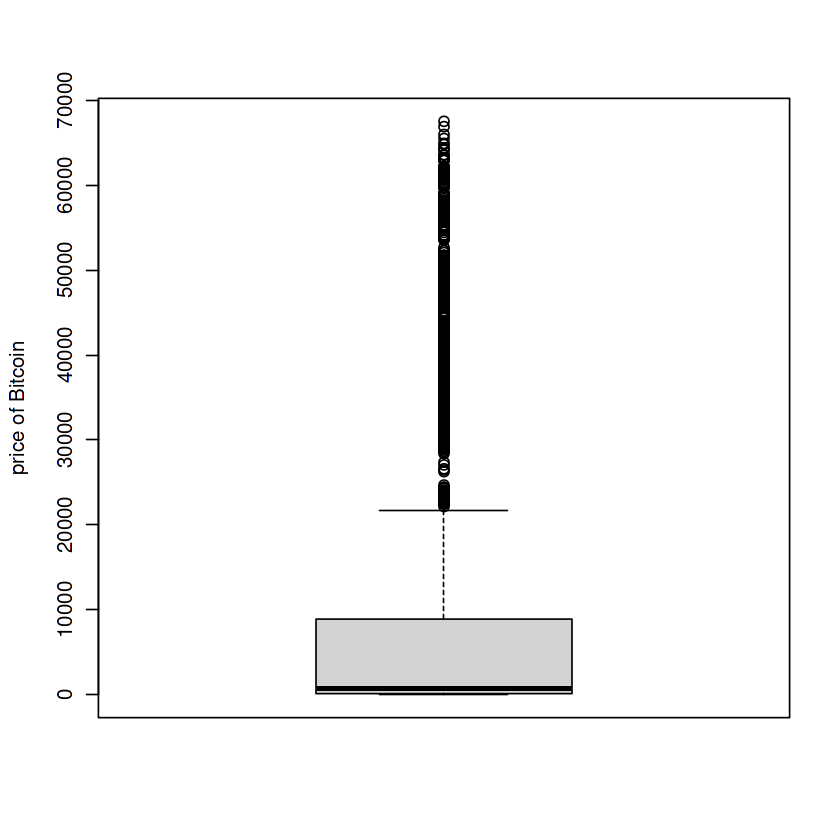

In [11]:
boxplot(Bitcoin_Gold_price$Price, ylab = "price of Bitcoin")

* boxplot(Bitcoin_Gold_price$Price, ylab = "price of Bitcoin")

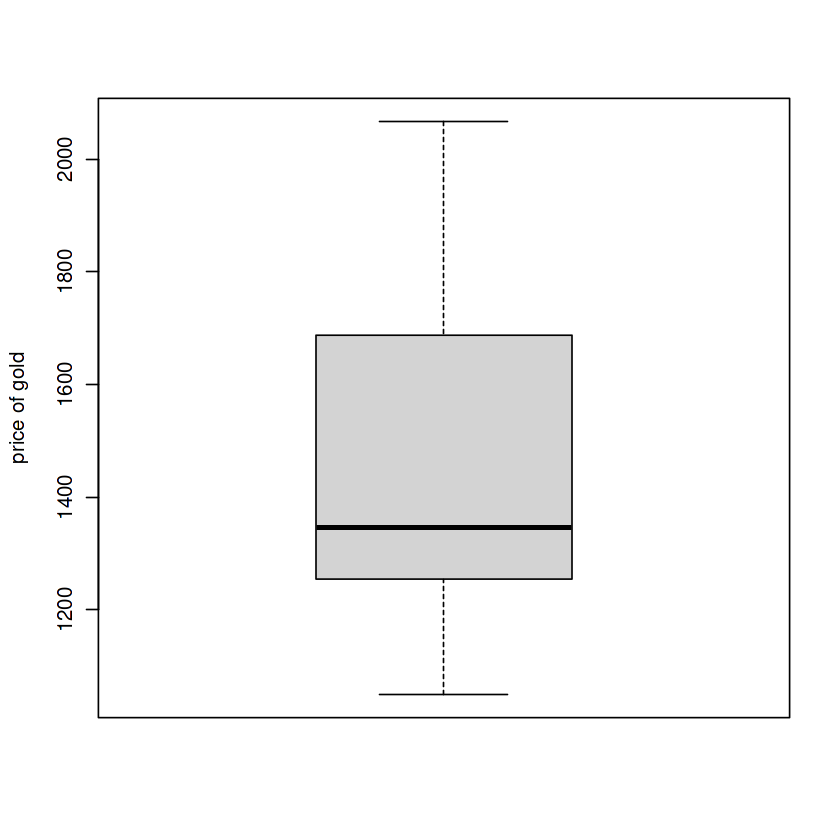

In [12]:
boxplot(Bitcoin_Gold_price$Gold_price, ylab = "price of gold")

Comparing the boxplots of the bitcoin prices vs the gold prices, they clearly indicate that the prices of gold are more normal and more stable compared to the prices of bitcoin which contained many outliers.

In [13]:
breaks <- seq(from = min(Bitcoin_Gold_price$Price), 
              to = max(Bitcoin_Gold_price$Price), 
              length = 11)

In [14]:
Bitcoin_price <- cut(Bitcoin_Gold_price$Price, 
                       breaks = breaks, 
                       include.lowest = TRUE, 
                       right = TRUE)

In [15]:
table(Bitcoin_price)

Bitcoin_price
     [0.1,6.75e+03] (6.75e+03,1.35e+04] (1.35e+04,2.03e+04]  (2.03e+04,2.7e+04] 
               2993                 723                 100                  75 
 (2.7e+04,3.38e+04] (3.38e+04,4.05e+04] (4.05e+04,4.73e+04]  (4.73e+04,5.4e+04] 
                 75                 132                 130                  81 
 (5.4e+04,6.08e+04] (6.08e+04,6.75e+04] 
                 80                  33 

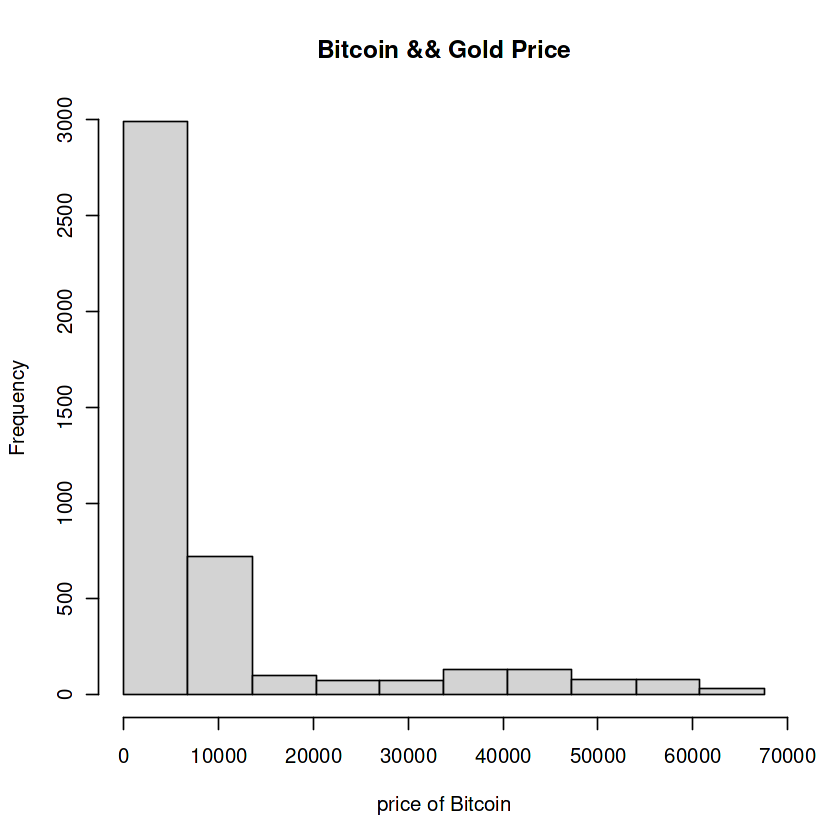

In [16]:
hist(Bitcoin_Gold_price$Price, 
     breaks = breaks,
     xlab = 'price of Bitcoin',
     main = 'Bitcoin && Gold Price')

In [17]:
gold_price <- cut(Bitcoin_Gold_price$Gold_price, 
                       breaks = breaks, 
                       include.lowest = TRUE, 
                       right = TRUE)

In [18]:
table(gold_price)

gold_price
     [0.1,6.75e+03] (6.75e+03,1.35e+04] (1.35e+04,2.03e+04]  (2.03e+04,2.7e+04] 
               4422                   0                   0                   0 
 (2.7e+04,3.38e+04] (3.38e+04,4.05e+04] (4.05e+04,4.73e+04]  (4.73e+04,5.4e+04] 
                  0                   0                   0                   0 
 (5.4e+04,6.08e+04] (6.08e+04,6.75e+04] 
                  0                   0 

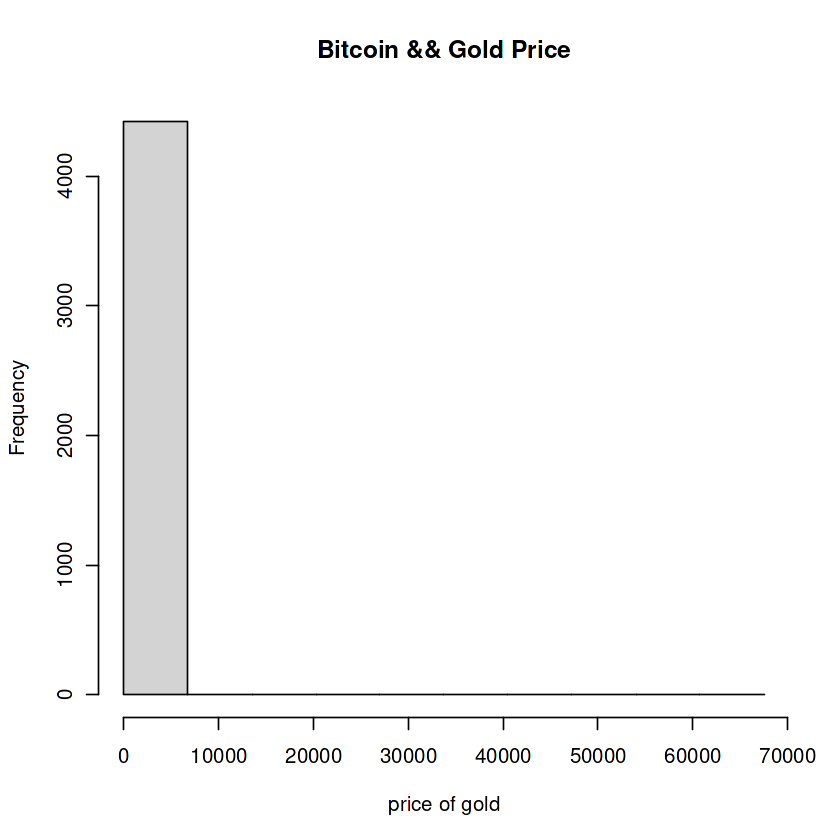

In [19]:
hist(Bitcoin_Gold_price$Gold_price, 
     breaks = breaks,
     xlab = 'price of gold',
     main = 'Bitcoin && Gold Price')

* Comparing the two frequency histograms of the prices of bitcoin vs gold we can see in the bitcoin histogram there's a sudden huge recline in the prices, whereas in the gold prices histogram, there are increases and decreases but not as much as the bitcoin's graph which proves that bitcoin prices are risky to invest in as you can't predict if it will fall or rise in its prices, whereas in gold its more stable.

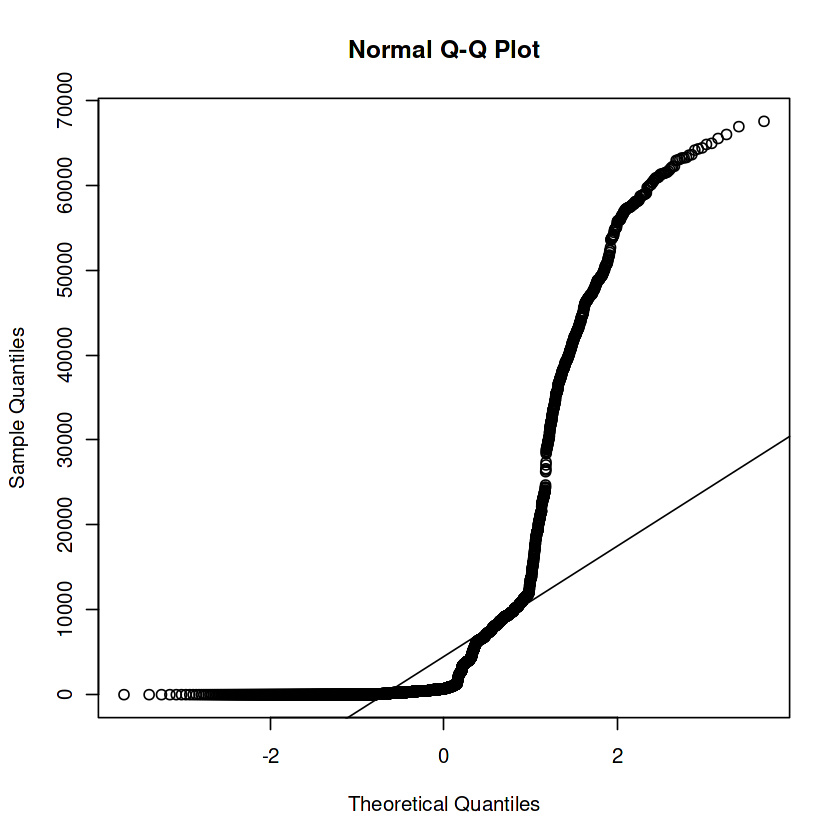

In [20]:
qqnorm(Bitcoin_Gold_price$Price)
qqline(Bitcoin_Gold_price$Price)

Bitcoin prices q-q plot is a hyper normal graph kurt= +3.73, which proves that the datapoints lower frequency are very distant from the mean plus it shows outliers.

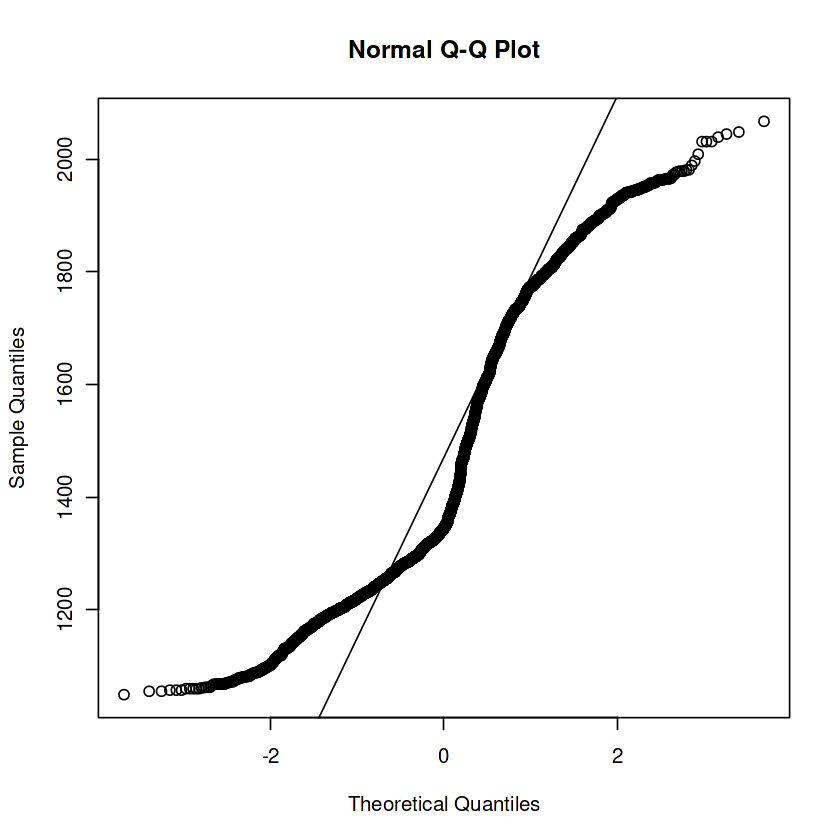

In [21]:
qqnorm(Bitcoin_Gold_price$Gold_price)
qqline(Bitcoin_Gold_price$Gold_price)

Gold prices q-q plot is a hypo normal graph kurt= -1.123, which proves that the datapoints are have a higher frequency of being distant from the mean.

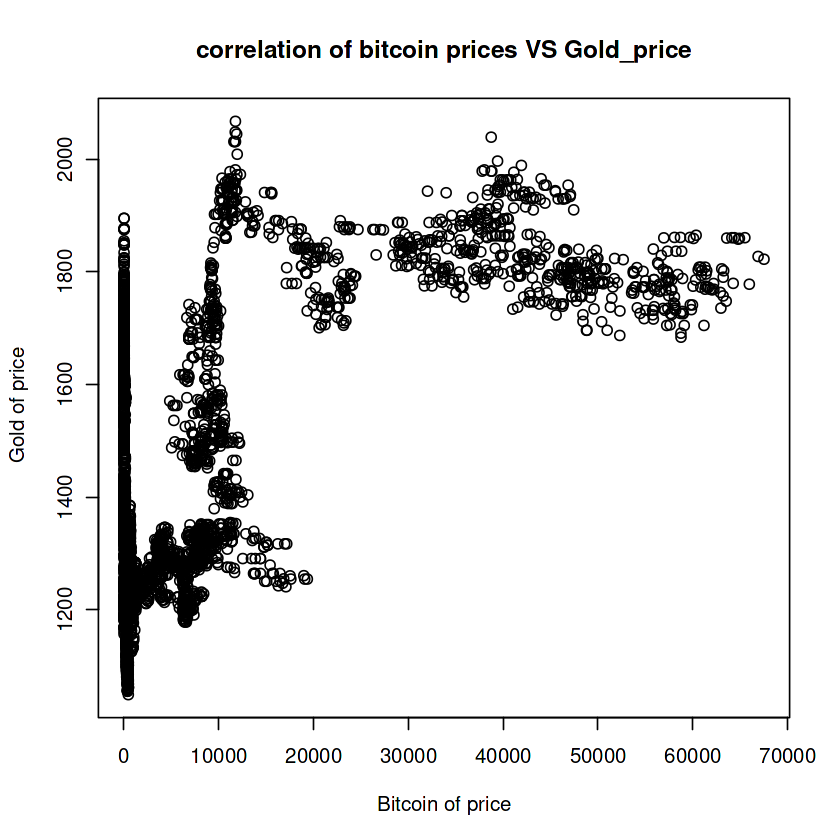

In [22]:
plot(x = Bitcoin_Gold_price$Price,
     y = Bitcoin_Gold_price$Gold_price,
     main = "correlation of bitcoin prices VS Gold_price",
     xlab = "Bitcoin of price",
     ylab = " Gold of price")

In [23]:
library(corrplot)

corrplot 0.92 loaded



# Pearson Correlation

In [24]:
cor(Bitcoin_Gold_price$Gold_price, Bitcoin_Gold_price$Price)

[1] 0.6004065

# Spearman's Correlation

In [25]:
cor(Bitcoin_Gold_price$Gold_price, Bitcoin_Gold_price$Price,method = "spearman")

[1] 0.2957582

* The correlation between the gold prices vs the bitcoin prices in Pearsman is linear more than the Spearman correlation which proves that x and y some how have an effect on each other.

In [26]:
Bitcoin_Gold_price_person <- cor(Bitcoin_Gold_price[,c("Price","Gold_price","Volume")])

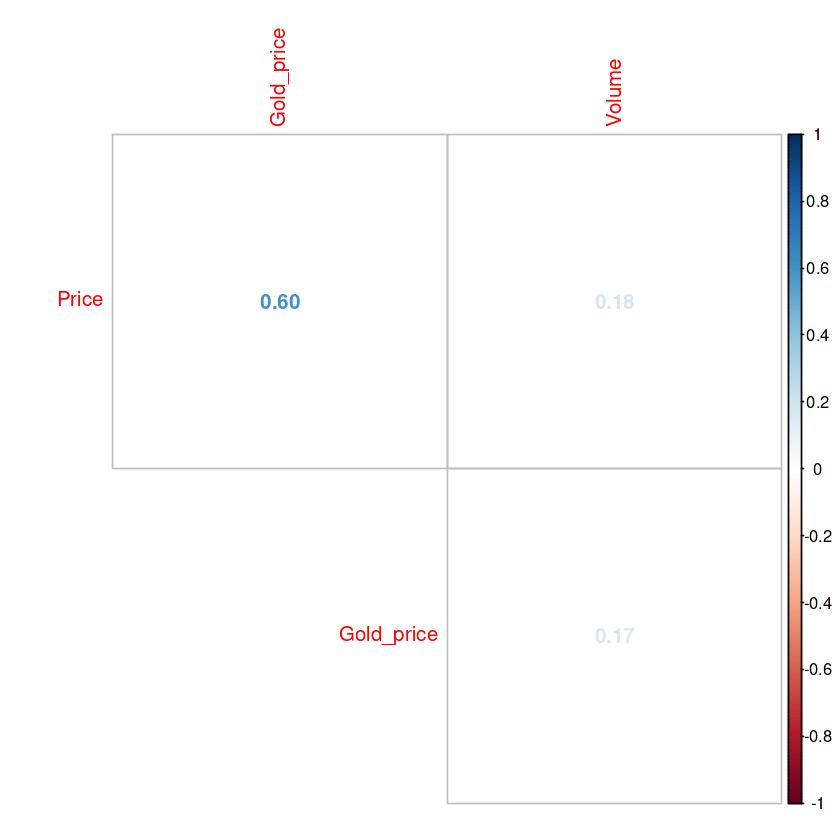

In [27]:
corrplot(Bitcoin_Gold_price_person, method = 'number', type = 'upper', diag = FALSE)

# Bootstrap

* Uses random sampling with replacement to estimate statistics from a sample, used to further investigate variability.
* 
* The more iterations you do the more accurate the standard error and the confidence interval will be.

In [28]:
library(boot)
set.seed(50)

In [29]:
stat_function <- function(x,id)
  median(x[id])

In [30]:
boot_obj <- boot(data = Bitcoin_Gold_price$Price, R= 3000, statistic = stat_function)

In [31]:
print(boot_obj)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Bitcoin_Gold_price$Price, statistic = stat_function, 
    R = 3000)


Bootstrap Statistics :
    original  bias    std. error
t1*    688.5  4.9215    38.95512


**Looking at the output above, we note the following:**

The standard error is $38.9 with a bias of $4.9

to visualize the resulting bootstrap set of the median of price.

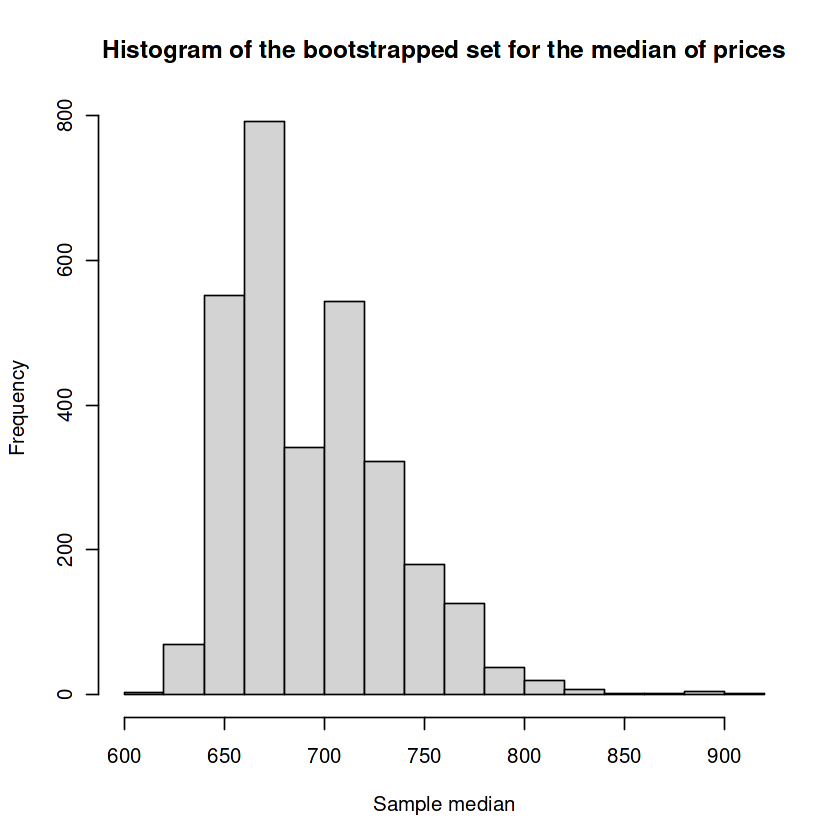

In [32]:
hist(boot_obj$t,
     xlab= "Sample median",
     main = "Histogram of the bootstrapped set for the median of prices")

In [33]:
boot.ci(boot_obj, type = "perc")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 3000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_obj, type = "perc")

Intervals : 
Level     Percentile     
95%   (640.3, 778.6 )  
Calculations and Intervals on Original Scale

**Insights:**

Given the bootstrap set, the probability that the true value of the median lies within $640.3 and $778.6 is 0.95 aka 95%

# Hypothesis test

metric: mean of price (bitcoin) + mean of (gold prices)

In [34]:
mean_bitcoin <- mean(Bitcoin_Gold_price$Price)
mean_gold <- mean(Bitcoin_Gold_price$Gold_price)

In [35]:
 mean_bitcoin - mean_gold

[1] 6863.305

According to the data, we can create our hypothesis statements :

**Null hypothesis:** There is no significant difference between the price of bitcoin and the price of gold from an investor's prespective.

**Alternative hypothesis:**The price of bitoin is more valuable than the price of gold for investors to invest in but is it safer/more stable?

The price of bitcoin on average is $6863.305 more than the price of gold.

# Conclusion:

We can now reject the null hypothesis with the help of our box plot, q-q plot and as well as the histogram visualizations, and we can confirm the alternative hypothesis as the bootstrap average proved that the price of bitcoin is more valuable however it is riskier for investors to invest in as the histograms + the range in the summary statistics proved that the rise + drop of prices in bitcoin the unpredictable.


## What would you rather invest in? Cryptocurrencies or traditional assets?